<a href="https://colab.research.google.com/github/DEV-SPD/Customer_Churn/blob/main/Customer_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
x=df.drop(columns = ['Exited','RowNumber','CustomerId'])
y=df.Exited
x.shape

(10000, 11)

In [ ]:
cat_features = ['Surname','Geography','Gender']
num_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

for i in cat_features:
  encoder = LabelEncoder()
  x[i] = encoder.fit_transform(x[i])
for j in num_features:
    scaler = StandardScaler()
    x_new = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(x_new, y, test_size=0.1, random_state=32)


In [ ]:
# importing tensorflow for building ANN Model
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, LeakyReLU, PReLU, Dropout, Activation

In [ ]:
# initializing ANN
model = Sequential()

In [ ]:
# building neural network architecture
model.add(Dense(6,activation='relu',input_dim=11))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
603/603 [==============================] - 3s 3ms/step - loss: 0.3922 - accuracy: 0.8292 - val_loss: 0.4058 - val_accuracy: 0.8176
Epoch 2/10
603/603 [==============================] - 2s 3ms/step - loss: 0.3889 - accuracy: 0.8307 - val_loss: 0.4014 - val_accuracy: 0.8223
Epoch 3/10
603/603 [==============================] - 1s 2ms/step - loss: 0.3860 - accuracy: 0.8305 - val_loss: 0.3981 - val_accuracy: 0.8230
Epoch 4/10
603/603 [==============================] - 2s 3ms/step - loss: 0.3834 - accuracy: 0.8346 - val_loss: 0.3958 - val_accuracy: 0.8280
Epoch 5/10
603/603 [==============================] - 2s 4ms/step - loss: 0.3805 - accuracy: 0.8383 - val_loss: 0.3934 - val_accuracy: 0.8314
Epoch 6/10
603/603 [==============================] - 2s 3ms/step - loss: 0.3791 - accuracy: 0.8378 - val_loss: 0.3905 - val_accuracy: 0.8310
Epoch 7/10
603/603 [==============================] - 2s 3ms/step - loss: 0.3763 - accuracy: 0.8406 - val_loss: 0.3924 - val_accuracy: 0.8283
Epoch 

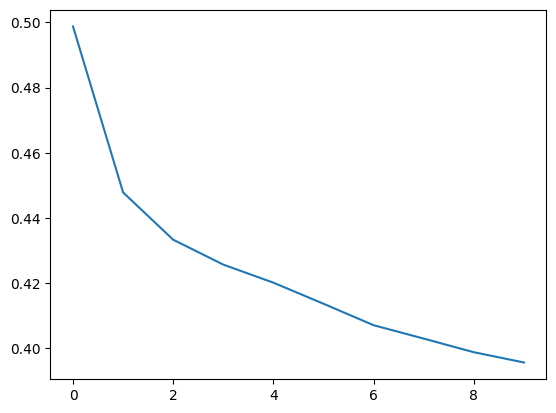

In [ ]:
plt.plot(model_history.history['loss'])

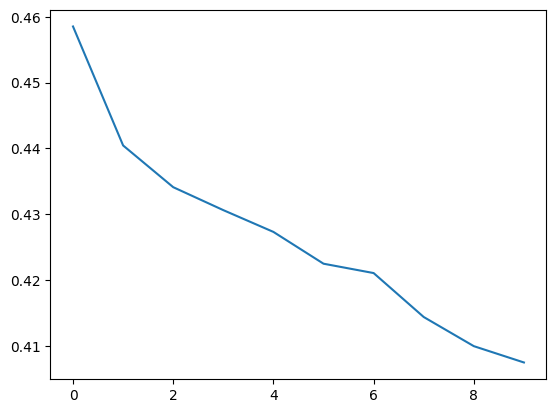

In [ ]:
plt.plot(model_history.history['val_loss'])

# KERAS TUNER

# OBJECTIVE:


1.   Finding suitable optimizer
2.   Finding appropriate no. of hidden layer
3.   Finding appropriate no. of nodes



In [ ]:
pip install -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.1 MB/s eta 0:00:00


In [ ]:
import kerastuner as kt

<ipython-input-21-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
def build_model(hp):

  model = Sequential()
  model.add(Dense(32,activation='relu',input_dim=11))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer',values=['adam','adagrad','adadelta','rmsprop']),loss='binary_cross_entropy')
  return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

In [ ]:
tuner.search(X_train,y_train,epochs=5)

In [ ]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'adagrad'}

In [ ]:
def build(hp1):
   model = Sequential()
   model.add(Dense(units=hp1.Int('units',min_value=8,max_value=128,steps=8),activation='relu',input_dim=11))
   model.add(Dense(1,activation='sigmoid'))
   model.compile(optimizer='adagrad',loss='binary_cross_entropy',metrics=['accuracy'])
   return model

In [ ]:
tuner_1 = kt.RandomSearch(build,
                          objective='val_accuracy',
                          max_trials=10
)

In [ ]:
tuner_1.search(X_train,y_train,epochs=10)

In [ ]:
tuner_1.get_best_hyperparameters()[0].values

{'optimizer': 'adadelta'}